In [7]:
!pip install pennylane StrawberryFields tensorflow-hub tensorflow_text emoji pythainlp pennylane-sf  plotnine

     |████████████████████████████████| 4.4MB 977kB/s eta 0:00:01
     |████████████████████████████████| 71kB 11.1MB/s eta 0:00:01
     |████████████████████████████████| 8.7MB 11.3MB/s eta 0:00:01
     |████████████████████████████████| 235kB 29.0MB/s eta 0:00:01
     |████████████████████████████████| 112kB 23.6MB/s eta 0:00:01


You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!wget https://github.com/PyThaiNLP/truevoice-intent/archive/master.zip; unzip master.zip; cd truevoice-intent-master; unzip mari-intent.zip; cp *.* ../;

--2020-06-11 03:12:29--  https://github.com/PyThaiNLP/truevoice-intent/archive/master.zip
Resolving github.com (github.com)... 52.74.223.119
Connecting to github.com (github.com)|52.74.223.119|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/PyThaiNLP/truevoice-intent/zip/master [following]
--2020-06-11 03:12:30--  https://codeload.github.com/PyThaiNLP/truevoice-intent/zip/master
Resolving codeload.github.com (codeload.github.com)... 13.229.189.0
Connecting to codeload.github.com (codeload.github.com)|13.229.189.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [    <=>             ]   1.29M  2.07MB/s    in 0.6s    

2020-06-11 03:12:31 (2.07 MB/s) - ‘master.zip’ saved [1350596]

Archive:  master.zip
7ce601a547a4bac938b3bb0640a6036f7b89266c
   creating: truevoice-intent-master/
  inflating: truevoice-intent-master/.gitignore 

In [3]:
!mkdir ft_data
!mkdir truevoice_data

In [4]:
!wget https://github.com/rdisipio/qnlp/raw/master/models.py

--2020-06-11 03:12:33--  https://github.com/rdisipio/qnlp/raw/master/models.py
Resolving github.com (github.com)... 52.74.223.119
Connecting to github.com (github.com)|52.74.223.119|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdisipio/qnlp/master/models.py [following]
--2020-06-11 03:12:34--  https://raw.githubusercontent.com/rdisipio/qnlp/master/models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1212 (1.2K) [text/plain]
Saving to: ‘models.py’

models.py           100%[===================>]   1.18K  --.-KB/s    in 0s      

2020-06-11 03:12:34 (71.3 MB/s) - ‘models.py’ saved [1212/1212]



In [5]:
!wget https://github.com/rdisipio/qnlp/raw/master/models_quantum.py

--2020-06-11 03:12:35--  https://github.com/rdisipio/qnlp/raw/master/models_quantum.py
Resolving github.com (github.com)... 52.74.223.119
Connecting to github.com (github.com)|52.74.223.119|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdisipio/qnlp/master/models_quantum.py [following]
--2020-06-11 03:12:35--  https://raw.githubusercontent.com/rdisipio/qnlp/master/models_quantum.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8498 (8.3K) [text/plain]
Saving to: ‘models_quantum.py’

models_quantum.py   100%[===================>]   8.30K  --.-KB/s    in 0s      

2020-06-11 03:12:36 (41.7 MB/s) - ‘models_quantum.py’ saved [8498/8498]



In [33]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from tqdm import tqdm_notebook
from collections import Counter
import re
from sklearn.metrics import f1_score,precision_score,recall_score

#viz
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

def replace_newline(t):
    return re.sub('[\n]{1,}', ' ', t)

ft_data = 'ft_data/'

y = 'destination'
nb_class = 7

In [34]:
import string
import emoji
def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def replace_rep(text):
    def _replace_rep(m):
        c,cc = m.groups()
        return f'{c}xxrep'
    re_rep = re.compile(r'(\S)(\1{2,})')
    return re_rep.sub(_replace_rep, text)

def ungroup_emoji(toks):
    res = []
    for tok in toks:
        if emoji.emoji_count(tok) == len(tok):
            for char in tok:
                res.append(char)
        else:
            res.append(tok)
    return res

def process_text(text):
    #pre rules
    res = text.lower().strip()
    res = replace_url(res)
    res = replace_rep(res)
    
    #tokenize
    res = [word for word in res.split('|') if word and not re.search(pattern=r"\s+", string=word)]
    
    #post rules
    res = ungroup_emoji(res)
    
    return res

#Train-validation-test Split

We perform 85/15 train-validation split in addition to the test split by TrueVoice.

In [35]:
from sklearn.model_selection import train_test_split
all_df = pd.read_csv(f'mari-train-balanced.csv')
all_df['destination'] = all_df.destination.map(lambda x: x.replace(' ','_'))
#train_df, valid_df = train_test_split(all_df, test_size=0.15, random_state=1412)
train_df = all_df.reset_index(drop=True)
#valid_df = valid_df.reset_index(drop=True)
test_df = pd.read_csv(f'mari-test-balanced.csv')
test_df['destination'] = test_df.destination.map(lambda x: x.replace(' ','_'))
print(train_df.shape, test_df.shape)

(10303, 5) (2607, 5)


In [36]:
#test set prevalence
test_df['destination'].value_counts() / test_df.shape[0]

billing_and_payment      0.376678
promotions               0.220560
other_queries            0.176064
internet                 0.154200
international_dialing    0.034522
true_money               0.019946
lost_and_stolen          0.018028
Name: destination, dtype: float64

In [37]:
#!pip install pennylane pennylane-sf 

import pennylane
pennylane.device("strawberryfields.gaussian", wires=2) # ถ้า error ให้ restart runtime

<StrawberryFieldsGaussian device (wires=2, shots=1000) at 0x7f926c56e668>

In [38]:
import tensorflow_hub as hub
import tensorflow_text
import tensorflow as tf #tensorflow 2.1.0
from tensorflow.keras.callbacks import EarlyStopping

from models_quantum import make_model_quantum
enc = hub.load('https://tfhub.dev/google/universal-sentence-encoder-multilingual/3')

In [39]:
tf.keras.backend.set_floatx('float64') 

In [40]:
train_df.shape, test_df.shape

((10303, 5), (2607, 5))

In [41]:

def embed_text(X_txt):
    print("Embedding input text...")

    X = np.array([np.array(x) for x in enc(X_txt)])

    return X


In [42]:
X_train = embed_text(train_df.texts)

Embedding input text...


In [43]:
X_test = embed_text(test_df.texts)

Embedding input text...


In [44]:
embedding_dim =X_train.shape[-1]

In [45]:
embedding_dim

512

In [46]:
index = {j:i for i,j in enumerate(list(set(train_df[y].values)))}

In [47]:
index

{'promotions': 0,
 'international_dialing': 1,
 'true_money': 2,
 'billing_and_payment': 3,
 'other_queries': 4,
 'lost_and_stolen': 5,
 'internet': 6}

In [48]:
from tensorflow.keras.utils import to_categorical

In [49]:
y_train = [index[i] for i in train_df[y].values]

In [50]:
y_train = to_categorical(y_train)

In [51]:
y_test  = [index[i] for i in test_df[y].values]

In [52]:
y_test = to_categorical(y_test)

In [53]:
N_EPOCHS = 20
BATCH_SIZE = 32
n_categories = 7

In [54]:
embedding_dim = X_train.shape[-1]

In [55]:
import pennylane as qml
qml.about()

Name: PennyLane
Version: 0.9.0
Summary: PennyLane is a Python quantum machine learning library by Xanadu Inc.
Home-page: https://github.com/XanaduAI/pennylane
Author: None
Author-email: None
License: Apache License 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, autograd, semantic-version, appdirs, numpy, toml, networkx
Required-by: PennyLane-SF
Platform info:           Linux-4.15.0-72-generic-x86_64-with-Ubuntu-18.04-bionic
Python version:          3.6.8
Numpy version:           1.17.4
Scipy version:           1.3.1
Installed devices:
- default.gaussian (PennyLane-0.9.0)
- default.qubit (PennyLane-0.9.0)
- default.tensor (PennyLane-0.9.0)
- default.tensor.tf (PennyLane-0.9.0)
- strawberryfields.fock (PennyLane-SF-0.9.0)
- strawberryfields.gaussian (PennyLane-SF-0.9.0)


In [56]:
model = make_model_quantum(n_categories=n_categories,  n_qubits=4, n_layers=2, embedding_dim=embedding_dim)

In [57]:
model.summary()

Model: "QuantumPreprintClassifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_in (InputLayer)         [(None, 512)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 2052      
_________________________________________________________________
variational_quantum_circuit_ (None, 4)                 24        
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 35        
Total params: 2,111
Trainable params: 2,111
Non-trainable params: 0
_________________________________________________________________


In [58]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [59]:
model.compile(optimizer, loss='categorical_crossentropy')

In [60]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.01,restore_best_weights=True)

In [61]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
import numpy as np

In [62]:
class PlotLosses(tf.keras.callbacks.Callback): # code from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [63]:
callbacks = [early_stopping_callback,plot_losses]

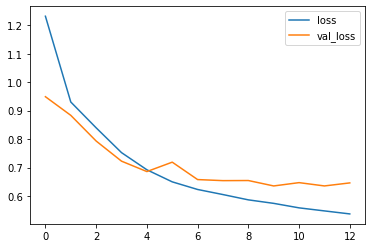

274/274 [==============================] - 1856s 7s/step - loss: 0.5369 - val_loss: 0.6459


In [64]:
history = model.fit(X_train, y_train,epochs=N_EPOCHS, batch_size=BATCH_SIZE,validation_split=0.15,callbacks =callbacks)

In [66]:
model.predict(X_test)

array([[6.73803959e-02, 1.26812790e-04, 3.15702918e-03, ...,
        4.94310533e-02, 6.80032665e-06, 8.55170684e-03],
       [9.29082539e-01, 4.78770722e-03, 1.10944396e-03, ...,
        2.68053628e-02, 4.87691401e-04, 2.02122309e-03],
       [4.39925945e-03, 2.71258910e-06, 9.14783190e-04, ...,
        1.01014895e-02, 7.72266699e-08, 1.82511880e-03],
       ...,
       [1.88100067e-01, 2.30537181e-03, 4.41603072e-04, ...,
        6.39437041e-01, 2.57339329e-03, 1.14048561e-01],
       [8.79402362e-01, 3.52231725e-03, 8.90292364e-04, ...,
        6.29300033e-02, 5.24305009e-04, 4.16035349e-03],
       [5.39311441e-03, 4.98887834e-03, 5.15601922e-03, ...,
        7.32391196e-02, 6.77908569e-03, 8.28422750e-01]])

In [67]:
test_score = model.evaluate(X_test, y_test, verbose=2)

82/82 - 66s - loss: 0.7100


In [68]:
print(test_score)

0.7099961910523992


In [69]:
t=model.predict(X_test)

In [70]:
val2tag = {i:j for i,j in zip(index.values(),index.keys())}

In [71]:
y_true = list(test_df[y].values)

In [72]:
y_pred = [val2tag[list(i).index(i.max())] for i in t]

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

                       precision    recall  f1-score   support

  billing_and_payment       0.82      0.84      0.83       982
international_dialing       0.81      0.64      0.72        90
             internet       0.72      0.69      0.70       402
      lost_and_stolen       0.89      0.66      0.76        47
        other_queries       0.74      0.71      0.72       459
           promotions       0.77      0.85      0.81       575
           true_money       0.76      0.50      0.60        52

             accuracy                           0.78      2607
            macro avg       0.79      0.70      0.73      2607
         weighted avg       0.78      0.78      0.78      2607

